<a href="https://colab.research.google.com/github/blackxhrt2102/project_related_to_medical/blob/main/Cirrhosis%20Prediction%20Dataset/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [542]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d fedesoriano/cirrhosis-prediction-dataset

cirrhosis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [543]:
import os,zipfile

data=zipfile.ZipFile('/content/cirrhosis-prediction-dataset.zip')
data.extractall('/content')

In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [545]:
data=pd.read_csv('/content/cirrhosis.csv',index_col='ID')

In [546]:
# Shape of the dataset:-

data.shape

(418, 19)

In [547]:
# First few rows in dataset:-

data.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [549]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [550]:
cat=data.select_dtypes(include='object')
reg=data.select_dtypes(exclude='object')

In [551]:
# Label Encoding

data['Sex']=data['Sex'].replace({'F':1,'M':0})
data['Ascites']=data['Ascites'].replace({'Y':1,'N':0})
data['Hepatomegaly']=data['Hepatomegaly'].replace({"Y":1,'N':0})
data['Spiders']=data['Spiders'].replace({"Y":1,'N':0})
data['Drug']=data['Drug'].replace({'D-penicillamine':1,'Placebo':2})
data['Status']=data['Status'].replace({'C':1,'D':2,'CL':3})

In [552]:
# Handling missing columns:-
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute=IterativeImputer(max_iter=21)
col=data.drop(['Drug','Edema','Status','Ascites'],axis=1).columns
data[col]=pd.DataFrame(impute.fit_transform(data[col]),columns=col)

data['Drug']=data['Drug'].fillna(0)



In [553]:
data['Status']=data['Status'].replace({'C':1,'D':2,'CL':3})
data['Edema']=data['Edema'].replace({'Y':1,'N':2,'S':3})

In [554]:
# Converting Age in year

data['Age']=data['Age']/365



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27d0134c10>,
      dtype=object)

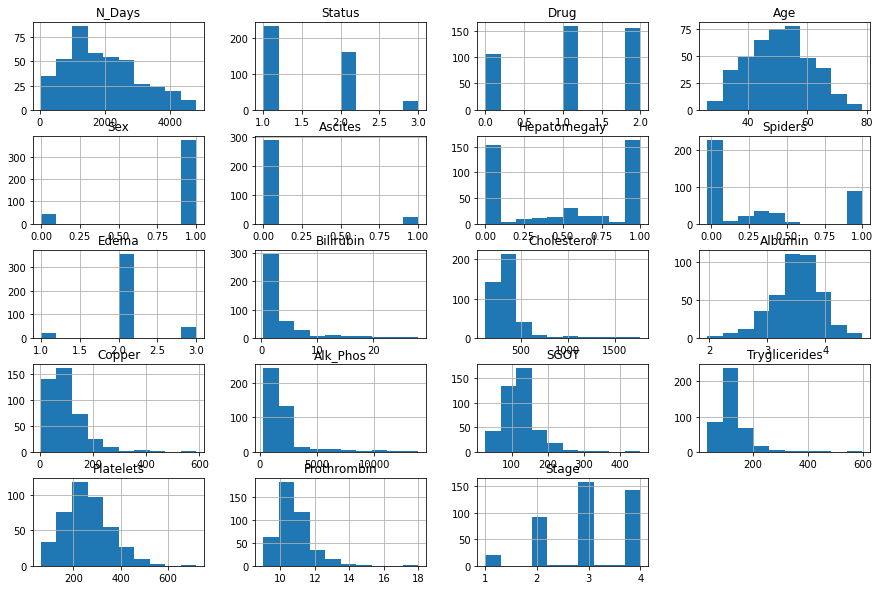

In [555]:
data.hist(figsize=(15,10))

In [556]:
from sklearn.preprocessing import PowerTransformer

tranform=PowerTransformer(method='yeo-johnson')
col=['SGOT','Alk_Phos','Tryglicerides','Prothrombin','Copper','Cholesterol']
data[col]=pd.DataFrame(tranform.fit_transform(data[col]),columns=col)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [557]:
data.dropna(inplace=True)

In [558]:
from imblearn.over_sampling import SMOTE
x=data.drop('Status',axis=1)
y=data['Status']

oversample = SMOTE()
x,y=(oversample.fit_resample(x,y))


In [559]:
x.drop(['N_Days','Drug','SGOT'],axis=1,inplace=True)

In [560]:
x.columns

Index(['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [561]:
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.2)

In [562]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif

model=RandomForestClassifier()
model.fit(xtrain,ytrain)
from sklearn.metrics import precision_score
yhat=model.predict(xvalid)
print((1,precision_score(yvalid,yhat,average='macro')))


(1, 0.8323622910089076)


In [563]:
from sklearn.metrics import precision_score
yhat=model.predict(xvalid)

precision_score(yvalid,yhat,average='macro')

0.8323622910089076

In [566]:
import joblib
joblib.dump(model,'/content/cirrhosis.h5')

['/content/cirrhosis.h5']